## We're going to look at what things impact the revenue of the movies

Dataset source: https://www.kaggle.com/datasets/danielgrijalvas/movies 


In [19]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# Read in the data

df_original = pd.read_csv(r'C:\Users\Dell\Desktop\DA Projects\movies.csv')
df = df_original.copy()

In [20]:
# Let's look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [21]:
# Let's check missing values:

# df.isnull().mean()
# df.isnull().sum()/df.shape[0] #option2

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [22]:
df[df.released.isna()]

name rating  genre  year released  score     votes  \
5728  Saw: The Final Chapter      R  Crime  2010      NaN    5.6   93000.0   
5730             The Wolfman      R  Drama  2010      NaN    5.8  104000.0   

            director               writer              star country  budget  \
5728  Kevin Greutert       Patrick Melton        Tobin Bell     NaN     NaN   
5730    Joe Johnston  Andrew Kevin Walker  Benicio Del Toro     NaN     NaN   

      gross company  runtime  
5728    NaN     NaN      NaN  
5730    NaN     NaN      NaN

In [23]:
# Remove row without released date

df = df.dropna(axis='index', how='any', subset=['released'])

In [41]:
# Remove row with gross revenue < 0

df[df['gross']<0].index

df.drop(df[df['gross']<0].index, inplace=True)

In [42]:
df.shape

(7663, 16)

In [43]:
# Data types

df.dtypes
    

name                   object
rating                 object
genre                  object
year                    int64
released       datetime64[ns]
score                 float64
votes                 float64
director               object
writer                 object
star                   object
country                object
budget                  int32
gross                   int32
company                object
runtime               float64
yearcorrect             int64
dtype: object

In [26]:
df.duplicated().sum()

0

In [27]:
# Change data type of columns budget and gross to integer
# First fill NaN value with 0

df['budget'] = df['budget'].fillna(0).astype('int')
df['gross'] = df['gross'].fillna(0).astype('int')

In [44]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

    released  score      votes         director                   writer  \
0 1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1 1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2 1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3 1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4 1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime  yearcorrect  
0    146.0         1980  
1    104.0         1980  
2    124.0         1980  
3     88.0         1980  
4     98.0         1980

In [45]:
# Format column "released" to datetime: 

def datetime_format(row):
    row = row.split(" (")[0]
    return pd.to_datetime(row)


df['released'] = df['released'].apply(datetime_format)
df.head()

AttributeError: 'Timestamp' object has no attribute 'split'

In [30]:
# Create a column with correct released year

# df['released'].astype(str).str[:4]
df['yearcorrect'] = df['released'].dt.year

In [31]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

    released  score      votes         director                   writer  \
0 1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1 1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2 1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3 1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4 1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime  yearcorrect  
0    146.0         1980  
1    104.0         1980  
2    124.0         1980  
3     88.0         1980  
4     98.0         1980

In [34]:
pd.set_option('display.max_rows', None)

In [35]:
df['company'].sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
447                                      Zoetrope Studios
302                                      Zoetrope Studios
724                                      Zoetrope Studios
520                                      Zoetrope Studios
352                                      Zoetrope Studios
332                                      Zoetrope Studios
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222          

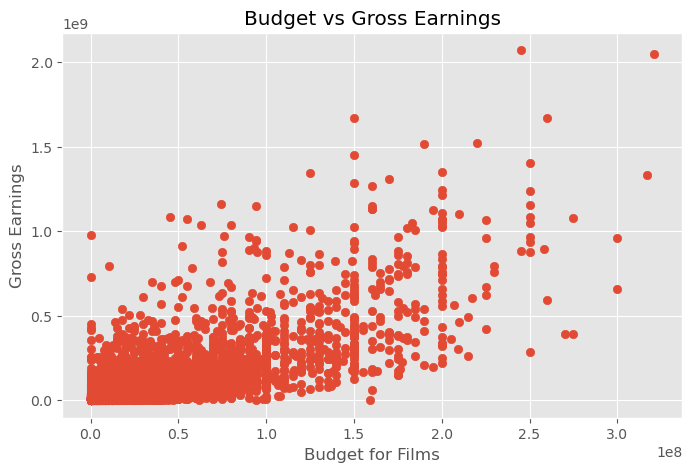

In [48]:
# Scatterplot with budget and gross

plt.figure(figsize=(8,5))
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Films')
plt.ylabel('Gross Earnings')



plt.show()

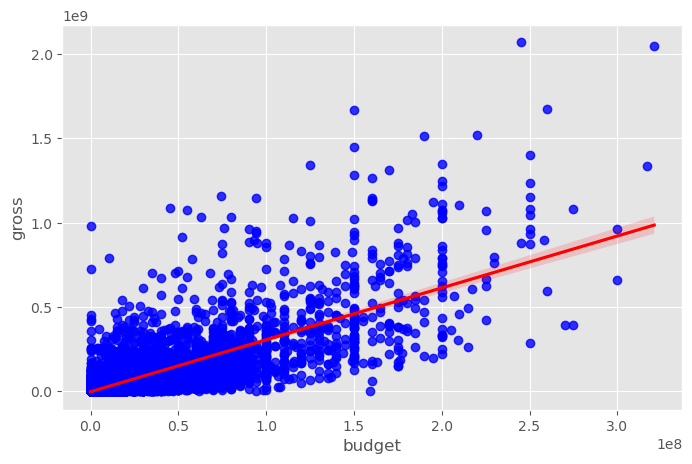

In [53]:
# Plot the budget vs gross using seaborn

plt.figure(figsize=(8,5))
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

plt.show()

In [55]:
df.corr(method='pearson') #pearson, kendall, spearman

year     score     votes    budget     gross   runtime  \
year         1.000000  0.097707  0.223022  0.309755  0.270464  0.120226   
score        0.097707  1.000000  0.408462  0.051780  0.185284  0.398355   
votes        0.223022  0.408462  1.000000  0.480304  0.632734  0.303399   
budget       0.309755  0.051780  0.480304  1.000000  0.754425  0.263135   
gross        0.270464  0.185284  0.632734  0.754425  1.000000  0.234342   
runtime      0.120226  0.398355  0.303399  0.263135  0.234342  1.000000   
yearcorrect  0.997414  0.105549  0.218512  0.300383  0.263221  0.120081   

             yearcorrect  
year            0.997414  
score           0.105549  
votes           0.218512  
budget          0.300383  
gross           0.263221  
runtime         0.120081  
yearcorrect     1.000000

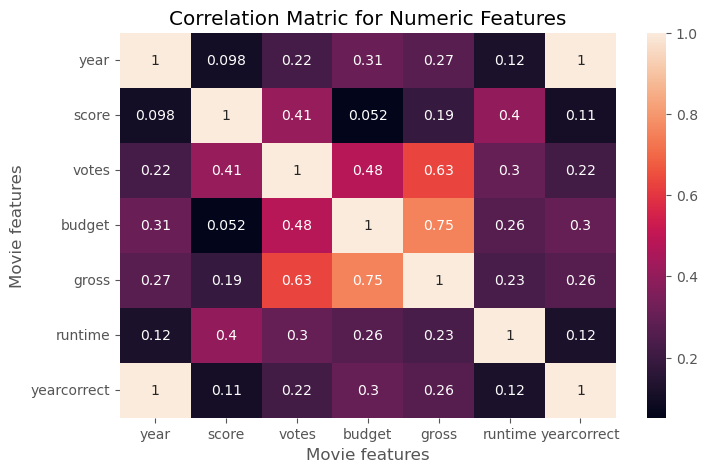

In [63]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)  #annotation showed
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [64]:
#Looks at company

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

    released  score      votes         director                   writer  \
0 1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1 1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2 1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3 1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4 1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime  yearcorrect  
0    146.0         1980  
1    104.0         1980  
2    124.0         1980  
3     88.0         1980  
4     98.0         1980

In [65]:
# Categorize all the object datatype for better visualisation

df_numerized = df
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype=='object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year   released  score      votes  director  \
0     6584       6      6  1980 1980-06-13    8.4   927000.0      2589   
1     5570       6      1  1980 1980-07-02    5.8    65000.0      2269   
2     5139       4      0  1980 1980-06-20    8.7  1200000.0      1111   
3      286       4      4  1980 1980-07-02    7.7   221000.0      1301   
4     1025       6      4  1980 1980-07-25    7.3   108000.0      1054   
5     2107       6     10  1980 1980-05-09    6.4   123000.0      2528   
6     5571       6      0  1980 1980-06-20    7.9   188000.0      1412   
7     4434       6      3  1980 1980-12-19    8.2   330000.0      1829   
8     5278       4      0  1980 1981-06-19    6.8   101000.0      2306   
9     6210       6      3  1980 1980-05-16    7.0    10000.0      2864   
10     463       4      0  1980 1980-12-17    6.1    18000.0       357   
11    5917       4      1  1980 1984-10-26    7.3    54000.0      1199   
12    4313       4      1  1980 1980-12-12    5.3    30000.0      2352   
13    4082       6      6  1980 1980-09-19    7.7    49000.0      2388   
14    1685       6      5  1980 1980-07-25    7.1    37000.0       318   
15    5021       4      6  1980 1980-10-03    7.2    27000.0      1243   
16    1898       6      6  1980 1980-05-16    6.6    21000.0        49   
17      92       4      4  1980 1980-12-19    6.9    29000.0       514   
18    5862       6     10  1980 1980-02-08    6.8    66000.0      1374   
19    5186       6      4  1980 1980-12-12    6.8    26000.0      2561   
20    1385       6      5  1980 1980-02-15    6.5    20000.0      2891   
21    2449       6      1  1980 1981-04-24    6.8    14000.0      1892   
22    5842       4      0  1980 1980-08-01    6.7    22000.0       744   
23    7440       4      8  1980 1980-08-08    5.3    12000.0      2371   
24    7122       4      6  1980 1980-06-06    6.4    14000.0      1153   
25     346       6     10  1980 1980-12-25    6.9    33000.0      1583   
26    3261       6      4  1980 1980-03-21    6.5     5100.0      2433   
27    4440       4      0  1980 1980-08-01    5.0     4100.0      1282   
28     978       6      5  1980 1980-06-20    7.2    17000.0      2673   
29     362       6      5  1980 1980-02-01    6.2    22000.0      2151   
30    3794       4      4  1980 1980-09-26    7.1     8900.0      2811   
31    4371       6     10  1980 1980-07-18    5.4    16000.0      2143   
32    4984       4      0  1980 1980-08-15    5.3    15000.0      1041   
33    1101       4      6  1980 1981-04-24    6.1      604.0      1644   
34    4782       4      4  1980 1980-12-19    6.7     9100.0      1225   
35    4360       6      4  1980 1980-10-10    6.2    24000.0      1091   
36    6005       6      4  1980 1980-05-30    6.3     4300.0       855   
37    3719       6      4  1980 1980-10-24    6.0    11000.0      1598   
38    6099       4      6  1980 1980-12-19    5.9     4000.0      2296   
39    1242       4      3  1980 1980-03-07    7.5    17000.0      1884   
40    6745       4      7  1980 1981-10-09    6.3     5700.0      1403   
41     925       4      6  1980 1980-07-03    7.9    13000.0       335   
42    6641       6      0  1980 1980-06-27    7.1     9000.0      2314   
43    7300       6      3  1980 1980-04-25    6.6    11000.0       186   
44    5501       6     10  1980 1980-10-31    4.8     2000.0      1978   
45    1150       6      4  1980 1980-07-18    6.1    12000.0      2804   
46    6091       6      0  1980 1980-06-13    5.3     3900.0      1934   
47    5575       6     10  1980 1980-11-07    4.6     3900.0      2836   
48    6357       4      0  1980 1980-05-09    5.1     3100.0       509   
49    3251       4      3  1980 1981-05-16    8.3    15000.0      1995   
50    5146       4      4  1980 1980-09-26    7.3    22000.0      2913   
51    3554       6      4  1980 1980-09-19    6.8     4500.0      1470   
52    1044       4      3  1980 1980-06-20    4.2     3700.0      2005   
53     969

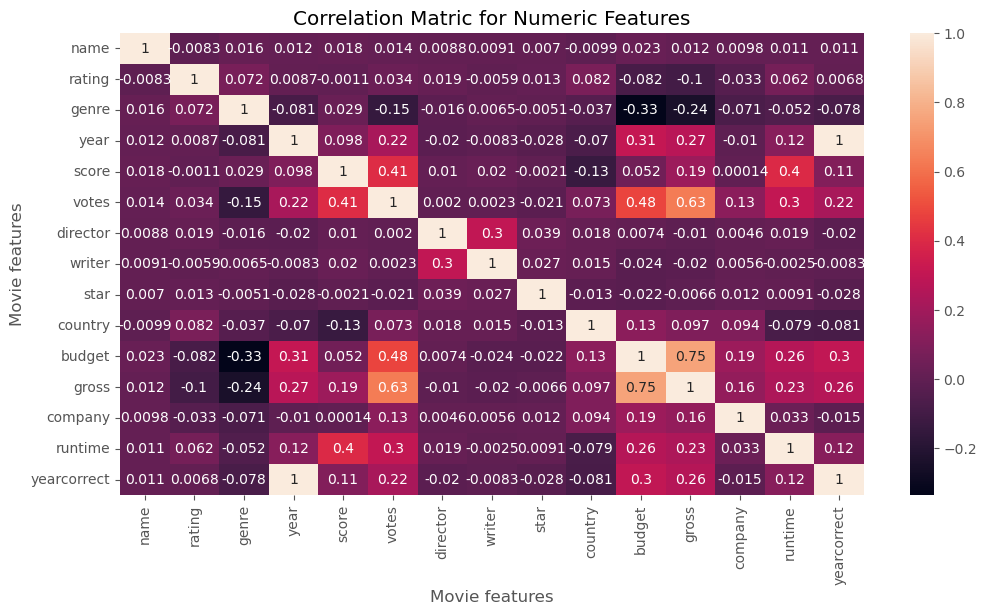

In [67]:
plt.figure(figsize=(12,6))
sns.heatmap(df_numerized.corr(), annot=True)  #annotation showed
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [69]:
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008261
             genre          0.015513
             year           0.011791
             score          0.017695
             votes          0.014173
             director       0.008805
             writer         0.009108
             star           0.007033
             country       -0.009871
             budget         0.022779
             gross          0.011726
             company        0.009762
             runtime        0.010893
             yearcorrect    0.011238
rating       name          -0.008261
             rating         1.000000
             genre          0.072311
             year           0.008663
             score         -0.001121
             votes          0.033684
             director       0.019463
             writer        -0.005877
             star           0.013439
             country        0.081963
             budget        -0.082244
             gross         -0.099580
 

In [71]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs

name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
year         year           1.000000
genre        genre          1.000000
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
             year           0.997414
year         yearcorrect    0.997414
budget       gross          0.754425
gross        budget         0.754425
votes        gross          0.632734
gross        votes          0.632734
budget       votes          0.480304
votes        budget         0.480304
             score          0.408462
score        votes          0.408462
             runtime        0.398355
runtime      score          0.398355
b

In [74]:
high_corr = sorted_pairs[sorted_pairs>0.5]
high_corr

name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
year         year           1.000000
genre        genre          1.000000
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
             year           0.997414
year         yearcorrect    0.997414
budget       gross          0.754425
gross        budget         0.754425
votes        gross          0.632734
gross        votes          0.632734
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings
